In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# generando time tables completas de los subhalos

In [55]:
import illustris_python as il
import numpy as np
import pandas as pd

def load_subhalo_tree(subhaloid):
    #generates a dictionary with all the particles of a given subhalo for a specific snapshot.
    basePath = '/virgotng/universe/IllustrisTNG/L35n2160TNG/output'
    Fields = ['SubfindID','SnapNum','SubhaloPos']
    arbolito = il.sublink.loadTree(basePath, 99, subhaloid, fields=Fields,onlyMPB=True)
    return(arbolito)

def generate_time_table_full(subhaloid, snapid, subhalopos_arr):
    basePath = '/virgotng/universe/IllustrisTNG/L35n2160TNG/output'
    Fields = ['Coordinates','ParticleIDs']
    snapshot = 99 - snapid
    print('Cargando particulas del subhalo')
    subhalo_dict = il.snapshot.loadSubhalo(basePath, snapshot, subhaloid, 'stellar', fields=Fields)
    x = subhalopos_arr[snapid][0]
    y = subhalopos_arr[snapid][1]
    z = subhalopos_arr[snapid][2]
    print('Transformando Dict a DataFrame')
    subhalo_df = pd.DataFrame()
    subhalo_df['ParticleIDs'] = subhalo_dict['ParticleIDs'][:]
    subhalo_df['x'] = subhalo_dict['Coordinates'][:,0]
    subhalo_df['y'] = subhalo_dict['Coordinates'][:,1]
    subhalo_df['z'] = subhalo_dict['Coordinates'][:,2]
    print('Cambiando marco de referencia')
    subhalo_df['x'] = subhalo_df['x'] - x
    subhalo_df['y'] = subhalo_df['y'] - y
    subhalo_df['z'] = subhalo_df['z'] - z
    return(subhalo_df)

def generate_time_tables_full(subhaloid, start_snap, end_snap):
    print('Cargando tree del subhalo')
    arbolito = load_subhalo_tree(subhaloid)
    subhalopos_arr = arbolito['SubhaloPos']
    for snapshot in range(start_snap,end_snap+1):
        snapid = 99 - snapshot
        subhaloid_i = arbolito['SubfindID'][snapid]
        subhalo_df = generate_time_table_full(subhaloid_i, snapid, subhalopos_arr)
        subhalo_df.to_csv(f'time_tables_full/{subhaloid}/snap_{snapshot}.csv')
        print(f'Tabla para particulas {subhaloid} en la snapshot {snapshot} CONSTRUIDA')
    return('Tablas generadas')
#-------#
# subhaloid = 547844

# arbolito = load_subhalo_tree(subhaloid)
# arbolito





In [4]:
from particle_follower import generate_time_tables_full

subhaloid = 547844;start_snap=15;end_snap=35

generate_time_tables_full(subhaloid, start_snap, end_snap)

Cargando tree del subhalo
Cargando particulas del subhalo
Transformando Dict a DataFrame
Cambiando marco de referencia
Tabla para particulas 547844 en la snapshot 15 CONSTRUIDA
Cargando particulas del subhalo
Transformando Dict a DataFrame
Cambiando marco de referencia
Tabla para particulas 547844 en la snapshot 16 CONSTRUIDA
Cargando particulas del subhalo
Transformando Dict a DataFrame
Cambiando marco de referencia
Tabla para particulas 547844 en la snapshot 17 CONSTRUIDA
Cargando particulas del subhalo
Transformando Dict a DataFrame
Cambiando marco de referencia
Tabla para particulas 547844 en la snapshot 18 CONSTRUIDA
Cargando particulas del subhalo
Transformando Dict a DataFrame
Cambiando marco de referencia
Tabla para particulas 547844 en la snapshot 19 CONSTRUIDA
Cargando particulas del subhalo
Transformando Dict a DataFrame
Cambiando marco de referencia
Tabla para particulas 547844 en la snapshot 20 CONSTRUIDA
Cargando particulas del subhalo
Transformando Dict a DataFrame
Cambi

'Tablas generadas'

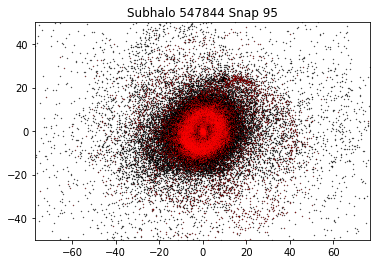

In [81]:
import matplotlib.pyplot as plt

subhaloid = 547844
snap = 95

fig, ax = plt.subplots()
ax.clear()
datos_df_full = pd.read_csv(f'time_tables_full/{subhaloid}/snap_{snap}.csv')
datos_df_cr = pd.read_csv(f'time_tables/{subhaloid}/snap_{snap}.csv')
ax.scatter(datos_df_full['y'],datos_df_full['z'],s=0.1,color='black',zorder=5)
ax.scatter(datos_df_cr['y'],datos_df_cr['z'],s=0.01,color='red',zorder=20,label='CR particles')
ax.axis('equal')
ax.set(xlim=(-50, 50), ylim=(-50, 50))
ax.set_title(f'Subhalo {subhaloid} Snap {snap}')
plt.show()

# Realizando el seguimiento para todos los subhalos!

In [14]:
from particle_follower import generate_time_tables_full
#531910 empieza a existir dede 53, revisar

# 455291,  478216,  501208,  
subhaloid_list = [531910,  547844,  570319, 571633,  582137,  589496,  598112,  606820,  619381,  628949]

start_snap=13;end_snap=99


for subhaloid in subhaloid_list:
    generate_time_tables_full(subhaloid, start_snap, end_snap)

Cargando tree del subhalo
Cargando particulas del subhalo
Transformando Dict a DataFrame
Cambiando marco de referencia
Tabla para particulas 531910 en la snapshot 13 CONSTRUIDA
Cargando particulas del subhalo
Transformando Dict a DataFrame
Cambiando marco de referencia
Tabla para particulas 531910 en la snapshot 14 CONSTRUIDA
Cargando particulas del subhalo
Transformando Dict a DataFrame
Cambiando marco de referencia
Tabla para particulas 531910 en la snapshot 15 CONSTRUIDA
Cargando particulas del subhalo
Transformando Dict a DataFrame


KeyError: 'ParticleIDs'